In [1]:
# Author:       Deepta Adhikary
# Date Created: 26-Jan-2023
# Email:        deeptoadhikary@gmail.com

In [2]:
import numpy as np
import numpy.random as rn
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

# Supervised Learning - Classification

Supervised learning refers to the application of machine learning on data that is labeled. In other words, for each sample input the output is defined and labeled. Regression and classification are the two main subtypes of supervised learning. Regression algorithms, given the input, attempt to predict a continuous value such as, height, gpa or salary. Whereas, classification algorithms are concerened with categorizing samples into discrete buckets. The figure below illustrates the difference between a regression and classification algorithm.

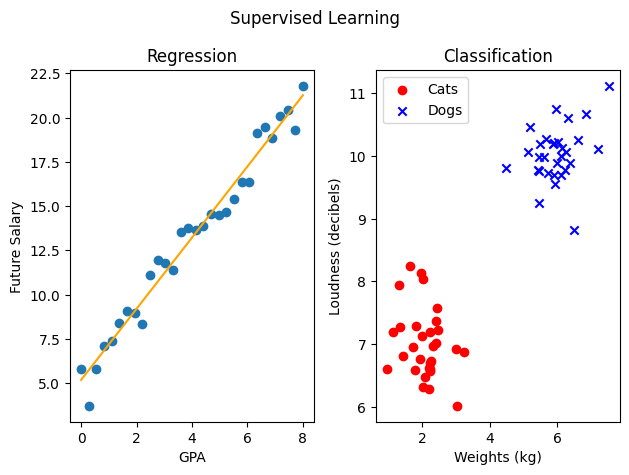

In [3]:
m = 30
noise_sd = 0.8

fig, axes = plt.subplots(1, 2)
ax1, ax2 = axes

# Regresssion
reg_x = np.linspace(0, 8, m)
# Y = 2x + 5 + noise
noise = rn.normal(0, noise_sd, m)
reg_y = (2*reg_x + 5) + noise

result = stats.linregress(reg_x, reg_y)
w = result[0]
b = result[1]

ax1.scatter(reg_x, reg_y)
ax1.plot(reg_x, w*reg_x+b, c='orange')
ax1.set_xlabel('GPA')
ax1.set_ylabel('Future Salary')

# Classification
clas_x1 = rn.normal(2, 0.5, m) # first cluster x
clas_x2 = rn.normal(6, 0.5, m) # second cluster x

clas_y1 = rn.normal(7, 0.5, m), # first cluster y
clas_y2 = rn.normal(10, 0.5, m) # second cluster y

ax2.scatter(clas_x1, clas_y1, c='r', marker='o')
ax2.scatter(clas_x2, clas_y2, c='b', marker='x')
ax2.set_xlabel('Weights (kg)')
ax2.set_ylabel('Loudness (decibels)')
ax2.legend(['Cats', 'Dogs'])

fig.suptitle('Supervised Learning')
ax1.set_title('Regression')
ax2.set_title('Classification')
fig.tight_layout()

## Types of Classification Problems

There are four main types of classification problems.

- **Binary Classification:** Classifying samples into two distinct buckets. Example: Cat or Dog
- **Multi-Class Classification:** Classifying samples into more than two buckets. Example: Letter Grade (A+, A, B+, ..., F)
- **Multi-Label Classification:** Classifying samples into buckets, however the buckets can overlap. Example: Identifying all the animals present in an image.
- **Imbalanced Classification:** A classification problem where the sample data is skewed, where one class overwhelms the other. Example: Detecting the presence of an extremely rare disease.

## Generative vs Discriminant Models

A generative model learns the underlying probability distribution of the data and can generate new samples from that distribution, while a discriminative model learns to distinguish between different classes or categories of data.

An analogy would be; A generative model is like a chef who learns how to cook a dish by studying the recipe, ingredients and the process of cooking. While a discriminative model is like a food critic who learns to distinguish between different dishes by studying their taste, texture and presentation. In the real world, applications such as ChatGPT or Stable Diffusion would utilize generative models to generate speech and art whereas fingerprint/facial recognition systems in smart phones would utilize discriminant models to identify its user.

# Perceptron

A perceptron is a classic example of a discriminant model. It a very simple machine that makes a decision (discriminates) based on a boundary value (the decision-boundary).

The following `if-else` is precisely what a perceptron does.

In [4]:
radius = float(input('Enter tumor diameter (cm): ')) # ask for user input

decison_boundary = 6.7

if radius > decison_boundary:
    print('Decision: Cancer')
else:
    print('Decision: Not Cancer')

Enter tumor diameter (cm):  3


Decision: Not Cancer


Here we built a perceptron to diagnose cancer. What the above perceptron is saying is that, a tumor is unlikely to have a diameter less than or equal to 6.7 cm. Therefore, if the diameter is greater than 6.7 cm we will classify that as likely being cancer.

The usefulness of a perceptron machine hinges on the decision boundary (In the above example its the 6.7 cm value). If the decision boundary is way off, the machine will make incorrect classifications. Next we will look at algorithms to determine a satisfactory decision boundary.

## Perceptron Training

Before we start training our perceptron, it would be useful to define a perceptron mathematically. From the above example we can see that the perceptron is a simple `if-else` statement. To translate this into math we need a piecewise function, in this context we call it a step function, $h(z)$. We define the perceptron as follow:

$$
\begin{equation} \label{eq1}
\begin{split}
\hat{y} = h(z) & = step(z) \\
 & = step(wx + b) \\
 & = \left\{
        \begin{array}{ll}
            1, & \quad wx + b \gt 0 \\
            0, & \quad wx + b \leq 0
        \end{array}
    \right.
\end{split}
\end{equation}
$$

Since we're dealing with math and we want to generalize our perceptron, it returns either 1 or 0 instead of saying 'Cancer' or 'Not Cancer'. The perceptron will return 1 if $wx + b \gt 0$ and 0 if $wx + b \leq 0$ for the input $x$ (diameter of the tumor, for example). The main objective of training is to find the best values for $w$ and $b$ that make accurate classification of the training data.

The decision boundary is defined to be the solution to $wx + b = 0$. Let us assume $w = 10$ and $b = -67$ then by doing some algebra we get $x = 6.7$ which is a vertical line the represents the decision boundary. Any $x$ greater than 6.7 will be classified as 1 and 0 otherwise.

Training a perceptron involves starting with an arbitrary $w$ and $b$ and iterative improve the model. The pseudocode for the algorithm is as follows:

$\text{for each iteration:}$ \
&nbsp;&nbsp;&nbsp;&nbsp;$\text{for each example:}$ \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$w := w - \alpha(\hat{y}^{(i)} - y^{(i)})x^{(i)}$ \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$b := b - \alpha(\hat{y}^{(i)} - y^{(i)})$


Where,

$x^{(i)}$ is the input for the i-th example

$\hat{y}^{(i)}$ is the predicted output for the i-th example, either 0 or 1

$y^{(i)}$ is the labeled/true output for the for the i-th example, either 0 or 1

and $\alpha$ is some constant

Note that when the perceptron predicts the correct output, i.e. $\hat{y}^{(i)} = y^{(i)}$ then the term $\alpha(\hat{y}^{(i)} - y^{(i)})$ is reduced to 0. Therefore, the $w$ and $b$ value remain the same when the perceptron classifies the example correctly and changes when it gets an example incorrect.

The following animation visualizes this iterative algrothim for training a perceptron.

![](src/img/classification02.gif)

Let's train a perceptron of our own!

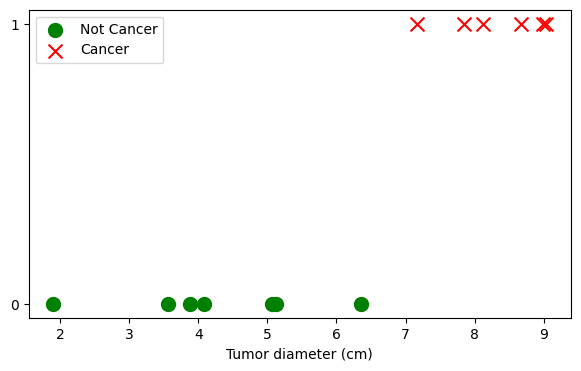

In [5]:
# generate training data
X = np.array([3.56, 8.12, 8.99, 3.88, 5.06, 8.67, 9.04, 4.08, 6.35, 7.16, 7.85, 5.12, 1.9 ])
Y = np.array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0])

# plot training data
fig, ax = plt.subplots(figsize = (7, 4))

# plot non cancerous tumours
ax.scatter(X[Y == 0], Y[Y == 0], marker='o', c='g', s=100, label='Not Cancer')
# plot cancerous tumours
ax.scatter(X[Y == 1], Y[Y == 1], marker='x', c='r', s=100, label='Cancer')

ax.set_xlabel('Tumor diameter (cm)')
ax.legend()
ax.set_yticks([0, 1]);

In [6]:
def perceptron_train(alpha, iterations):
    w = 0.5 # abritrary start
    b = -0.5 # arbitrary start
    
    for _ in range(iterations):
        for x, y in zip(X, Y):
            y_hat = 1 if (w * x + b) > 0 else 0 # calculate predicted value.
            
            w = w - alpha * (y_hat - y) * x # calculate new w
            b = b - alpha * (y_hat - y) # calculate new b
    
    return w, b


# testing out the training algorithm
w, b = perceptron_train(alpha=0.5, iterations=7)

print(f'The answer convereged at (w={w :.3f}, b={b :.3f})')

The answer convereged at (w=0.955, b=-6.500)


After about 7 iterations $w$ and $b$ converged at 0.955 and -6.5 respectively, and this value was able to discriminate between cancerous and non-cancerous tumours. If we increase the number of iterations even more, the $w$ and $b$ will not change. The figure below shows the resulting decision boundary.

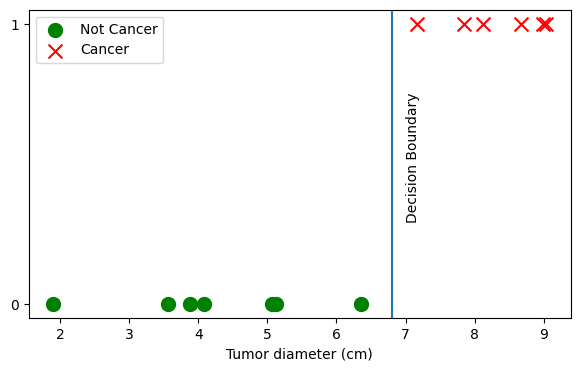

In [7]:
ax.axvline(x=-b/w)
ax.text(7, 0.3,'Decision Boundary', rotation=90)
fig

This was a simplified example with just one feature. To generalize this process we need to rely on vectorization and linear algebra. We need to make slight modifications to the perceptron definition.

For a sample with $n$ features, let's define the percetron in this manner.

$$
\begin{equation} \label{eq1}
\begin{split}
\hat{y} = h(z) & = step(z) \\
 & = step(w_1x_1 + w_2x_2 + \dots + w_nx_n + b) \\
 & = \left\{
        \begin{array}{ll}
            1, & \quad w_1x_1 + w_2x_2 + \dots + w_nx_n + b \gt 0 \\
            0, & \quad w_1x_1 + w_2x_2 + \dots + w_nx_n + b \leq 0
        \end{array}
    \right.
\end{split}
\end{equation}
$$


Note, the term for $z$ can be vectorized: $w_1x_1 + w_2x_2 + \dots + w_nx_n + b = \begin{bmatrix} w_1 \\ w_2 \\ \vdots \\ w_n \end{bmatrix} \cdot \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix} + b = \vec{w} \cdot \vec{x} + b$

Then, we can simplify the model of a perceptron to this:

$$
\begin{equation} \label{eq2}
\begin{split}
\hat{y} = h(z) & = step(z) \\
 & = step(\vec{w} \cdot \vec{x} + b) \\
 & = \left\{
        \begin{array}{ll}
            1, & \quad \vec{w} \cdot \vec{x} + b \gt 0 \\
            0, & \quad \vec{w} \cdot \vec{x} + b \leq 0
        \end{array}
    \right.
\end{split}
\end{equation}
$$

In [8]:
def perceptron_train(alpha, iterations):
    w = 0.5 # abritrary start
    b = -0.5 # arbitrary start
    
    for _ in range(iterations):
        for x, y in zip(X, Y):
            y_hat = 1 if (w * x + b) > 0 else 0 # calculate predicted value.
            
            w = w - alpha * (y_hat - y) * x # calculate new w
            b = b - alpha * (y_hat - y) # calculate new b
    
    return w, b


# testing out the training algorithm
w, b = perceptron_train(alpha=0.5, iterations=7)

print(f'The answer convereged at (w={w :.3f}, b={b :.3f})')

The answer convereged at (w=0.955, b=-6.500)


In [9]:
def perceptron_train(alpha, iterations): # generalized version of perceptron training algorithm
    
    w = np.zeros(X.shape[1]) # initialize w to a zero vector
    b = 0
    
    # instead of iterating a fixed number of time, we will just iterate until the perceptron gets everything correct.
    for _ in range(iterations):
        for x, y in zip(X, Y):
            y_hat = 1 if (np.dot(w, x) + b) > 0 else 0 # calculate predicted value
            
            w = w - alpha * (y_hat - y) * x # calculate new w vector
            b = b - alpha * (y_hat - y) # calculate new b scalar
    
    return w, b

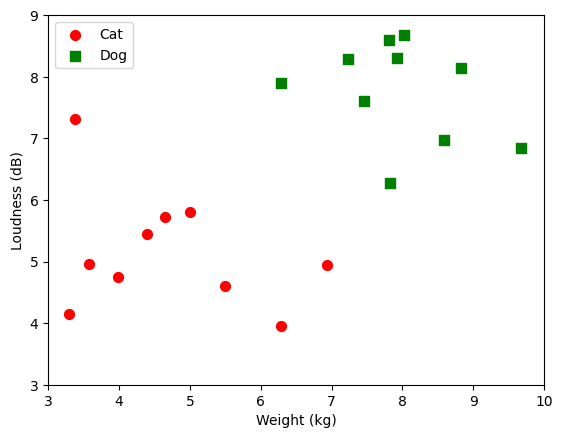

In [10]:
X = np.array([[4.65, 5.72],
       [4.4 , 5.44],
       [5.5 , 4.61],
       [6.93, 4.95],
       [3.98, 4.75],
       [3.38, 7.32],
       [6.29, 3.96],
       [5.  , 5.8 ],
       [3.29, 4.14],
       [3.58, 4.96],
       [8.83, 8.14],
       [7.92, 8.3 ],
       [8.02, 8.67],
       [7.81, 8.59],
       [9.68, 6.84],
       [7.46, 7.61],
       [7.83, 6.27],
       [7.23, 8.29],
       [6.29, 7.9 ],
       [8.59, 6.98]])

Y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


fig, ax = plt.subplots()

ax.scatter(X[Y==0][:, 0], X[Y==0][:, 1], label='Cat', c='r', marker='o', s=50)
ax.scatter(X[Y==1][:, 0], X[Y==1][:, 1], label='Dog', c='g', marker='s', s=50)

ax.set_ylim(3, 9)
ax.set_xlim(3, 10)
ax.legend(loc='upper left')

ax.set_xlabel('Weight (kg)')
ax.set_ylabel('Loudness (dB)');

In [11]:
# training the perceptron
w, b = perceptron_train(alpha=0.5, iterations=247)

print(f'The answer convereged at (w1={w[0] :.3f}, w2={w[1] :.3f}, b={b :.3f})')

The answer convereged at (w1=7.840, w2=3.745, b=-73.500)


After about 247 iterations, the perceptro converges at an acceptable decision boundary. Again the decision boundary is located at $\vec{w} \cdot \vec{x} + b = 0$.

In this example it would be $w_1x_1 + w_2x_2 + b = 7.84x_1 + 3.745x_2 - 73.5 = 0$

Or $x_2 = \frac{-7.84}{3.745}x_1 + \frac{73.5}{3.745}$. We then plot this in the form of $x_2=mx_1+b$

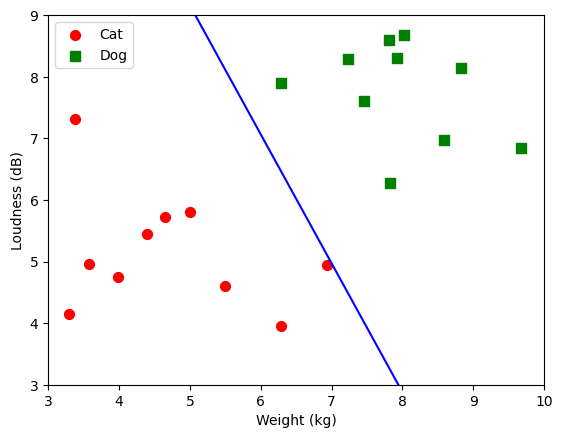

In [12]:
d = np.linspace(3, 10, 10)
ax.plot(d, (-w[0]*d - b)/w[1], c='b')
fig

This method may seem like random trial & error, but surprisngly this algorithm will always converge after a finite number of iterations for any linearly seperable set of data points. The proof of this property can be found [here](https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote03.html). In practice further optimizations are be made to reduce the number of iterations.

# Support Vector Machine

A Support Vector Machine (SVM) is a discriminant model. Like the Perceptron it draws a decision boundary to discrimiate between two samples, however unlike a perceptron the SVM attempts to maximize the margin between the closests opposite sample points (the so called "Support Vectors").

<p style="display:block;text-align:center;"><img src="src/img/classification03.jpg" alt="drawing" width="400"/></p>

Here, $d$ represents the margin that SVM attempts to maximize and the sample points highlighted in red are the support vectors. Given a set of data points a perceptron might choose a decision boundary like this.

<p style="display:block;text-align:center;"><img src="src/img/classification04.jpg" alt="drawing" width="400"/></p>

However, an SVM would try to maximaze the margin between the opposite sample points. Therefore it would create its decision boundary here.

<p style="display:block;text-align:center;"><img src="src/img/classification05.jpg" alt="drawing" width="400"/></p>

To understand maximizing the margin is better lets look at what happens when the model is tested against a new data point, highlighted in black.

<p style="display:block;text-align:center;"><img src="src/img/classification06.jpg" alt="drawing" width="400"/></p>

Since this data point is to the right of the decison boundary the perceptron would classify this as belonging to the green group. However, visualy this data point seems much closer to the red group than the green. This the perceptron has failed to correctly classify this new data point. On the other hand, the SVM has drawn a different decision boundary and it is able to correctly classify the point as belonging to the red group.

<p style="display:block;text-align:center;"><img src="src/img/classification07.jpg" alt="drawing" width="400"/></p>

The length of the margin can be calculated from the following formula.

$$
2d = \frac{2}{\lVert \vec{w} \rVert}
$$

The objectetive of the SVM is to maximize this margin.

Note, the $\vec{w}$ vector is the same as the one from the perceptron model, they represent the weights of each feature. And $\lVert \vec{w} \rVert = \sqrt{w_1^2 + w_2^2 + \dots + w_n^2}$. Then the SVM model can be defined similarly to that of a perceptron, except instead of labeling sample points as 1 or 0, the SVM labels them as 1 and -1.

$$
\begin{equation}
\begin{split}
\hat{y} = h(z) &  = \left\{
        \begin{array}{ll}
            1, & \quad \vec{w} \cdot \vec{x} + b \geq 1 \\
            -1, & \quad \vec{w} \cdot \vec{x} + b \leq -1
        \end{array}
    \right.
\end{split}
\end{equation}
$$

Note that when $z = \vec{w} \cdot \vec{x} + b$ is between $(-1, 1)$ those data points would be considered inside the margin. Additionally, $z = 1$, $z = -1$ and $z = 0$ gives the left margin, right margin and the decision boundary respectively. Using this information we can define some special properties. Recall, $y$ is the true label of the sample points and can be either $1$ or $-1$.

- When $yz = 0$ then the point is right on the boundary. Since $z$ must be equal to 0.
- When $yz = -1$ the data point is classified wrongly and on the wrong margin. Since wither $y=-1$ and $z=1$ or $y=1$ and $z=-1$.
- Similarly, when $yz = 1$ the data point is classified correctly and on the correct margin. Since both $y$ and $z$ have to be 1 or -1.
- When $yz \lt -1$ The data point was misclassified and outside the margin.
- When $yz \gt 1$ The data point was correctly classified and outside the margin.
- When $-1 \gt yz \gt 0$ The data point was misclassified and inside the margin.
- When $0 \lt yz \lt 1$ The data point was correctly classified and inside the margin.

## Soft-margin SVM

One of the drawbacks of implementing the SVM in the manner describe above (and Perceptrons as well) is that they are sensitive to outliers. SVM maximizes the margin between the closest opposite sampples, but what if there was an outlier from the red group very close to the green group? In this case maximum margin the SVM could create will still be too narrow and we run into the same problem as we did with the Perceptron.

To fix this short-coming the Soft-margin SVM was adopted. This variation of the SVM allows some data points to stay within the margin regardless if they are correctly or incorrectly classified. This techinique allows the SVM to misclassify some data points, but the model performs much better in the long run; this is an example of the ["Bias-variance tradeoff"](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff) that shows up in machine learning all the time.

<p style="display:block;text-align:center;"><img src="src/img/classification08.jpg" alt="drawing" width="400"/></p>

In addition to classification, there exists SVM Regression models that are able to perform well on regression problems.

# Logistic Regression

Logistic Regression is a classification model, despite having the word "regression" in the name. Logistic Regression is used to model probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick or 0/1. At the core of Logistic Regression is the sigmoid function "S-curve".

$$
\sigma(z) = \frac{1}{1+e^{-z}} = \frac{e^z}{e^z+1} = 1 - \sigma(-z)
$$

The logistic regression model, $h$ can be defined as $\hat{y} = h(z) = \sigma(x) = \sigma(\vec{w} \cdot \vec{x} + b)$. The value $\hat{y}$ can be interpreted as the probability that the class is 1.

The decision boundary can be set based on a $\text{threshold}$ value. Generally, $\vec{w} \cdot \vec{x} + b = \sigma^{-1}(\text{threshold})$ is the equation for the decision boundary. If the $\text{threshold} = 0.5$ then, $\vec{w} \cdot \vec{x} + b = 0$ is the decision boundary since $\sigma^{-1}(0.5) = 0$. The treshold value represents how certain the model should be when it classifies a sample as 1. With a higher threshold the model will only classify samples as 1 when it is absolutely certain and vice versa.

The following figure shows the sigmoid function

In [13]:
def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    """
    return 1/(1 + np.exp(-Z))

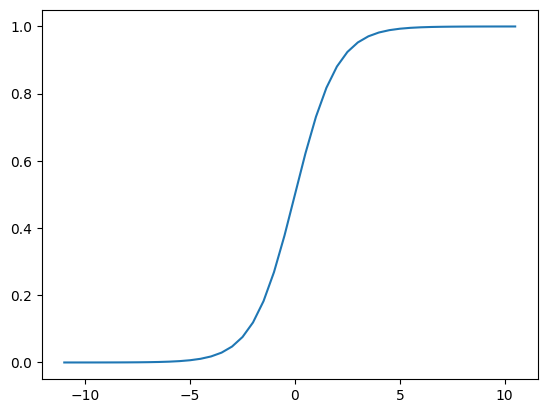

In [14]:
sigmoid_x = np.arange(-11., 11., step=0.5)
sigmoid_y = sigmoid(sigmoid_x)
plt.plot(sigmoid_x, sigmoid_y)
plt.show()

## Finding a Loss Function

As usual, the hard part of lies within training the model. Here the goal is, like always, find $\vec{w}$ (weight vectors for each input/feature) and $b$ (bias) to optimize the cost function $J(\vec{w}, b)$.

$J(\vec{w}, b) = \frac{1}{m} \Sigma_{i=1}^{m} L(y^{(i)}, \hat{y}^{(i)})$ where $L$ is the loss function. Now we need to find a reasonable loss function.

If we define $L$ similarly to that of linear regression, $L(y^{(i)}, \hat{y}^{(i)}) = (y^{(i)} - \hat{y}^{(i)})^2$ (aka. square error), the job of finding the optimal $\vec{w}$ and $b$ becomes significantly harder. This is mostly because the cost function, unlike in linear regression, is non-convex.

<p style="display:block;text-align:center;"><img src="src/img/classification09.jpg" alt="drawing" width="600"/></p>

And so you can imagine it would be difficult for any hill-decending algorithm to not get stuck in a local minima and not find the actual global minima. Therefore, the square-error is **NOT** a reasonable loss function for logistic regression.

<hr>

In practice the loss function is defined in the following manner.

$$
\begin{equation}
\begin{split}
L(y^{(i)}, \hat{y}^{(i)}) = \left\{
        \begin{array}{ll}
            -log(\hat{y}^{(i)}), & \quad y^{(i)} = 1 \\
            -log(1 - \hat{y}^{(i)}), & \quad y^{(i)} = 0
        \end{array}
    \right.
\end{split}
\end{equation}
$$

To see why defining the loss function is defined in this manner, we can create a confusion matrix.

<table>
    <thead>
        <tr>
            <th></th>
            <th>$y^{(i)} = 1$</th>
            <th>$y^{(i)} = 0$</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>$\hat{y}^{(i)} \rightarrow 1$ </td>
            <td>$0$ </td>
            <td>$\infty$ </td>
        </tr>
        <tr>
            <td>$\hat{y}^{(i)} \rightarrow 0$</td>
            <td>$\infty$ </td>
            <td>$0$ </td>
        </tr>
    </tbody>
</table>

This above matrix shows that, when $\hat{y}^{(i)}$ (predictied label) is close to $y^{(i)}$ (actual label) the cost function outputs a number close to 0. If $\hat{y}^{(i)}$ (predictied label) is far from $y^{(i)}$ (actual label) then the cost function outputs a large number approaching infinity.

Additionally the piecewise loss function above can also be written in the form: $L(y^{(i)}, \hat{y}^{(i)}) = \color{red}{-y^{(i)}log(\hat{y}^{(i)})} - \color{teal}{(1-y^{(i)})log(1- \hat{y}^{(i)})}$. Note, when $y^{(i)} = 0$ the $\color{red}{\text{left-term}}$ of the equation evaluates to 0 and when $y^{(i)} = 1$ the $\color{teal}{\text{right-term}}$ of the quation evaluates to 0.

## Logistic Regression Training

Unlike in linear regression, logistic regression does not have a closed-form normal equation to give us the optimal $\vec{w}$ and $b$. The two methods available to us are gradient descent and Newton's method.

## Gradient Descent in Logistric Regression

In this iterative approach we make tiny changes to $\vec{w}$ and $b$ and see its impact on the cost function $J$, and after many iterations we find and optimal solution.

below is an implementation of this gradient descent technique on a sample data.

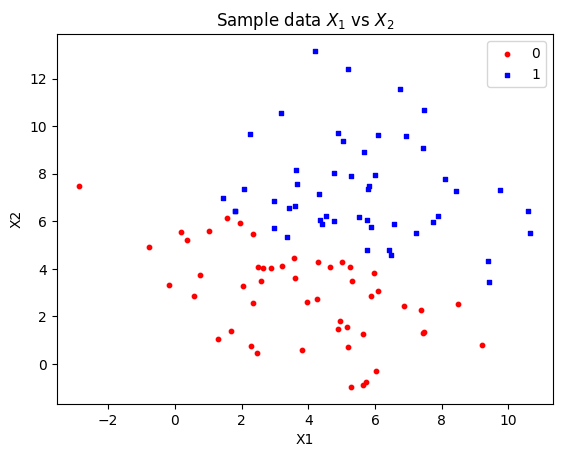

In [15]:
m = 100 #number of samples
n = 2 # number of samples

rn.seed(42)

# m X 2 matrix of [X1 X2] values
X = np.round(rn.normal(5, 3, size=(m, n)), 2)

# labels
Y = np.array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0])

fig, ax = plt.subplots()

ax.scatter(X[Y==0][:, 0], X[Y==0][:, 1], c='r', marker='o', s=10, label='0')
ax.scatter(X[Y==1][:, 0], X[Y==1][:, 1], c='b', marker='s', s=10, label='1')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title(r'Sample data $X_1$ vs $X_2$')
ax.legend();

In gradient decent for each iteration we perform the following operation:

$$
\displaylines{
\vec{w} := \vec{w} - \alpha \frac{\partial J(\vec{w}, b)}{\partial \vec{w}} \\
b := b - \alpha \frac{\partial J(\vec{w}, b)}{\partial b}
}
$$

Here, $\alpha$ is the learning rate. You can think of the partial derivative $\frac{\partial J(\vec{w}, b)}{\partial \vec{w}}$ as quantity that represents how responsive the cost function $J(\vec{w}, b)$ is to small changes in $\vec{w}$. Similarly, $\frac{\partial J(\vec{w}, b)}{\partial b}$ quatifies how responsive the cost function is to small changes in $b$. These can be calculated as follows.

$$
\displaylines{
\frac{\partial J(\vec{w}, b)}{\partial \vec{w}} =  \frac{1}{m} \Sigma_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)}) \vec{x}^{(i)}\\
\frac{\partial J(\vec{w}, b)}{\partial b} = \frac{1}{m} \Sigma_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})
}
$$

In [16]:
def LogRegrTrain(n_iter, alpha):
    """
    Logistic Regression training algorithm gradient descent.
    
    n_iter - number of iterations
    alpa   - learning rate
    """
    rn.seed(42) # set random seed
    w = rn.randn(n, 1) # n x 1 weight matrix
    b = 0.5
    
    y = Y.reshape(m, 1) # reshape Y to m x 1 matrix
    
    for _ in range(n_iter):
        Z = np.matmul(X, w) + b
        y_hat = sigmoid(Z)
        
        # calculate partial derivatives
        dw = 1/m * np.matmul(X.T, y_hat-y)
        db = 1/m * (y_hat-y).sum()
        
        w = w - alpha * dw
        b = b - alpha * db
    
    return w, b

w = [[0.69636207]
 [1.63202823]] 
b = -11.075742080514535


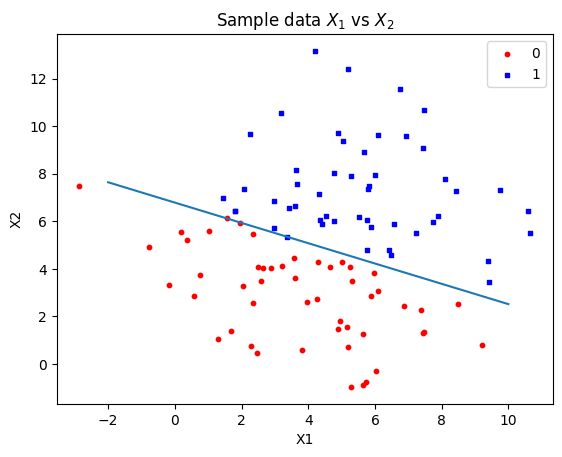

In [17]:
n_iter = 700
alpha = 0.5

w, b = LogRegrTrain(n_iter, alpha)
print('w =', w, '\nb =', b)

h = np.linspace(-2, 10, 10)
ax.plot(h, (-w[0]*h - b)/w[1])

fig

# Summary


## Perceptron vs SVM

- Compared to a Perceptron the SVM is modern approach to classification problems.
- A Perceptron focuses on misclassified examples where as SVM tries to increase the boundary between the closest examples of opposite classes (i.e. the support vectors).

## Logistic Regression vs SVM

- An SVM is sensitive to the support vectors where as Logistic Regression is influenced by all points.
- SVM naturally works well with linearly seperable data where as Logistic Regression works well even with data that is not linearly seperable.

<p style="display:block;text-align:center;"><img src="src/img/classification10.jpg" alt="drawing" width="600"/></p>